Is home ownership becoming a less attainable goal?
    
As a group we are interested in housing in Central Florida and how, as the volume of housing increases, 
the rate of private ownership versus rental becomes inverse. 

Is home ownership becoming a less attainable goal?
 

In [1]:
%matplotlib inline
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


*Availability – As the overall volume of housing increases overtime, there are fewer homes available for purchase.
We expect the proportion of available rental homes will go up in comparison to the number of homes available for purchase. 
We expect that the large volume of housing is going to rental homes.

Our research question then is: 
       how has the proportion of available homes to rental homes changed over the last five years? 
        
We will examine this for Orange County, Florida.

In [2]:
# data manipulation

# Files to Load 
act_HistCt_file= os.path.join('resources','activList_HistCt.csv')
act_Summary_file= os.path.join('resources','miniSummary.csv')

# Read School and Student Data File and store into Pandas Data Frames
actHistCt_data = pd.read_csv(act_HistCt_file)
actSummary_data = pd.read_csv(act_Summary_file)

actSummary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 9 columns):
year               33 non-null int64
Property Type      33 non-null object
yrTot_avail        18 non-null float64
yr_avg_avail       18 non-null float64
yrAvg_avail_all    6 non-null float64
yrTot_numSales     18 non-null float64
yrAvg_numSales     18 non-null float64
yrTot_spTrend      32 non-null float64
yrAvg_spTrend      32 non-null float64
dtypes: float64(7), int64(1), object(1)
memory usage: 2.4+ KB


In [3]:
#trim years to 2014-2018
years=[2014, 2015, 2016, 2017, 2018]
#yearsFC=[2014,2015,2016,2017,2018,2019,2020,2021]   #in the event of forecasting

#removes years not being measured
summaryAll = actSummary_data[actSummary_data.year.isin(years)]

summaryAll.reset_index(drop=True)
summaryAll.head()

,year,Property Type,yrTot_avail,yr_avg_avail,yrAvg_avail_all,yrTot_numSales,yrAvg_numSales,yrTot_spTrend,yrAvg_spTrend
15,2014,Private,80137.0,6678.0,4094.92,15863.0,1322.0,3979052.0,175697.0
16,2014,Rental,18141.0,1512.0,NaN,9191.0,766.0,57154.0,2357.0
17,2014,Both,98278.0,8190.0,NaN,25054.0,2088.0,4036206.0,178054.0
18,2015,Private,85971.0,7164.0,4188.83,21544.0,1795.0,4390349.0,190165.0
19,2015,Rental,14561.0,1213.0,NaN,8711.0,726.0,56901.0,2385.0


In [5]:
#Data prep
#data separated by property type
rentalTotalData=summaryAll[summaryAll['Property Type']=='Rental']
privateTotalData=summaryAll[summaryAll['Property Type']=='Private']
allTotalData=summaryAll[summaryAll['Property Type']=='Both']

#merge dataframes
availHsg_DF = pd.merge(rentalTotalData,privateTotalData, on="year")
availHsgDF = pd.merge(availHsg_DF,allTotalData, on="year")

#rename columns
availHsgDF.rename(columns={
                           'yrTot_avail_x': 'Rental Housing Available', 
                           'yr_avg_avail_x':'Rental Housing Available Average',
                            'yrTot_avail_y': 'Private Housing Available', 
                           'yr_avg_avail_y':'Private Housing Available Average',
                           'yrTot_avail': 'Total Available Housing', 
                           'yr_avg_avail':'Avg Available Housing',

                           'yrTot_numSales_x': 'Rentals Sales Number Total', 
                           'yrAvg_numSales_x':'Rental Sales Number Average',
                           'yrTot_numSales_y': 'Private Sales Number Total', 
                           'yrAvg_numSales_y':'Private Sales Number Average',
                           'yrTot_numSales': 'Housing Sales Number Total', 
                           'yrAvg_numSales_y':'Housing Sales number Average',

                           'yrTot_spTrend_x': 'Rentals Sales Price Trend', 
                           'yrAvg_spTrend_x':'Rental Sales Price Trend Average',
                           'yrTot_spTrend_y': 'Sales Price Trend Total', 
                           'yrAvg_spTrend_y':'Private Sales Price Trend Average',
                           'yrTot_spTrend ': 'Sales Price Trend', 
                           'yrAvg_spTrend':'Sales Price Trend Average'
                         }, inplace=True)


availHsgDF.head(15)
#availHsgDF.info()

,year,Property Type_x,Rental Housing Available,Rental Housing Available Average,yrAvg_avail_all_x,Rentals Sales Number Total,Rental Sales Number Average,Rentals Sales Price Trend,Rental Sales Price Trend Average,Property Type_y,...,Sales Price Trend Total,Private Sales Price Trend Average,Property Type,Total Available Housing,Avg Available Housing,yrAvg_avail_all,Housing Sales Number Total,yrAvg_numSales,yrTot_spTrend,Sales Price Trend Average
0,2014,Rental,18141.0,1512.0,NaN,9191.0,766.0,57154.0,2357.0,Private,...,3979052.0,175697.0,Both,98278.0,8190.0,NaN,25054.0,2088.0,4036206.0,178054.0
1,2015,Rental,14561.0,1213.0,NaN,8711.0,726.0,56901.0,2385.0,Private,...,4390349.0,190165.0,Both,100532.0,8378.0,NaN,30255.0,2521.0,4447250.0,192550.0
2,2016,Rental,15008.0,1251.0,NaN,8540.0,712.0,57055.0,2370.0,Private,...,4825235.0,211938.0,Both,90316.0,7526.0,NaN,29868.0,2489.0,4882290.0,214307.0
3,2017,Rental,15375.0,1281.0,NaN,8990.0,749.0,56868.0,2369.0,Private,...,5354151.0,234242.0,Both,81611.0,6801.0,NaN,30814.0,2568.0,5411019.0,236611.0
4,2018,Rental,13488.0,1124.0,NaN,8370.0,698.0,56522.0,2341.0,Private,...,5867051.0,254679.0,Both,74730.0,6228.0,NaN,30220.0,2518.0,5923573.0,257020.0


In [4]:
#Calculations


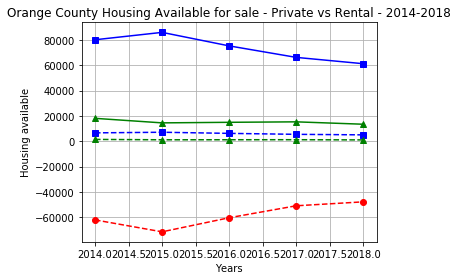

In [13]:
#prepare plot details

#x axis
#x_axis=np.array(yearsFC)   #in the event of forecasting
x_axis=np.array(years)

#y axis
yRental=np.array(availHsgDF['Rental Housing Available'])
yPrivate=np.array(availHsgDF['Private Housing Available'])
yAll=np.array(availHsgDF['Total Available Housing'])
yRentalAvg=np.array(availHsgDF['Rental Housing Available Average'])
yPrivateAvg=np.array(availHsgDF['Private Housing Available Average'])
yAllAvg=np.array(availHsgDF['Avg Available Housing'])
yPvRDiff=np.array(availHsgDF['Rental Housing Available']-availHsgDF['Private Housing Available'])

#Grid Formatting
tick_locations=x_axis
plt.xticks=(tick_locations)
plt.grid(which='major',axis='both')

plt.title('Orange County Housing Available for sale - Private vs Rental - 2014-2018')
plt.xlabel("Years")
plt.ylabel("Housing available")

#plot
plt.plot(x_axis, yPrivate,marker='s', linestyle='solid', color='blue',  label='Private Hsg')
plt.plot(x_axis, yRental,marker='^', linestyle='solid', color='green',label='Rental Hsg')
#plt.plot(x_axis, yAll, marker='*', linestyle='solid', color='black', label='All Available')
plt.plot(x_axis, yPrivateAvg, marker='s', linestyle='dashed', color='blue', label='Private Hsg')
plt.plot(x_axis, yRentalAvg, marker='^', linestyle='dashed', color='green', label='Rental Hsg')
#plt.plot(x_axis, yAllAvg, marker='*', linestyle='dashed', color='black', label='All Available')
plt.plot(x_axis, yPvRDiff, marker='o', linestyle='dashed', color='Red', label='All Available')

#Save the plot
plt.savefig("output/RentalVsPrivate.png")
plt.tight_layout()
plt.show()


In [7]:
#Pie Chart


In [8]:
#Scatter
#Scatter formatting
#rng = np.random.RandomState(0)
#colors = rng.rand(10)
#sizes = 100 * rng.rand(10)


##Grid Formatting - can use from previous?
